## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.010000, L2 = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s - loss: 198.6761 - acc: 0.2466 - val_loss: 41.0606 - val_acc: 0.2523
Epoch 2/50
50000/50000 [==============================] - 3s - loss: 19.0843 - acc: 0.1132 - val_loss: 7.2529 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 4.0922 - acc: 0.0987 - val_loss: 2.6395 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 2.4850 - acc: 0.0955 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0991 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0965 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] -

50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0966 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0955 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc

50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0957 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4624 - val_

50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0966 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0965 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 3s - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 2.4626 - acc: 0.0967 - val_loss: 2.4626 - val_

50000/50000 [==============================] - 2s - loss: 2.2838 - acc: 0.4521 - val_loss: 2.2765 - val_acc: 0.4257
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 2.1969 - acc: 0.4501 - val_loss: 2.1733 - val_acc: 0.4451
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 2.1265 - acc: 0.4517 - val_loss: 2.1017 - val_acc: 0.4483
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 2.0674 - acc: 0.4521 - val_loss: 2.0535 - val_acc: 0.4473
Epoch 25/50
50000/50000 [==============================] - 2s - loss: 2.0203 - acc: 0.4533 - val_loss: 2.0405 - val_acc: 0.4282
Epoch 26/50
50000/50000 [==============================] - 2s - loss: 1.9825 - acc: 0.4556 - val_loss: 1.9703 - val_acc: 0.4528
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 1.9509 - acc: 0.4552 - val_loss: 1.9393 - val_acc: 0.4542
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 1.9271 - acc: 0.4563 - val_loss: 1.9185 - val_

50000/50000 [==============================] - 2s - loss: 3.8073 - acc: 0.5593 - val_loss: 3.8945 - val_acc: 0.5097
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 3.7470 - acc: 0.5615 - val_loss: 3.8270 - val_acc: 0.5245
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 3.6856 - acc: 0.5663 - val_loss: 3.8050 - val_acc: 0.5105
Epoch 29/50
50000/50000 [==============================] - 2s - loss: 3.6247 - acc: 0.5691 - val_loss: 3.7663 - val_acc: 0.5108
Epoch 30/50
50000/50000 [==============================] - 2s - loss: 3.5646 - acc: 0.5733 - val_loss: 3.6930 - val_acc: 0.5201
Epoch 31/50
50000/50000 [==============================] - 2s - loss: 3.5086 - acc: 0.5761 - val_loss: 3.7096 - val_acc: 0.5006
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 3.4507 - acc: 0.5779 - val_loss: 3.6490 - val_acc: 0.4959
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 3.3973 - acc: 0.5816 - val_loss: 3.5527 - val_

50000/50000 [==============================] - 2s - loss: 3.4895 - acc: 0.5875 - val_loss: 3.6428 - val_acc: 0.5219
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 3.4346 - acc: 0.5905 - val_loss: 3.5783 - val_acc: 0.5278
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 3.3810 - acc: 0.5915 - val_loss: 3.5571 - val_acc: 0.5185
Epoch 34/50
50000/50000 [==============================] - 2s - loss: 3.3312 - acc: 0.5953 - val_loss: 3.4819 - val_acc: 0.5323
Epoch 35/50
50000/50000 [==============================] - 2s - loss: 3.2791 - acc: 0.5981 - val_loss: 3.4860 - val_acc: 0.5179
Epoch 36/50
50000/50000 [==============================] - 2s - loss: 3.2306 - acc: 0.5985 - val_loss: 3.6012 - val_acc: 0.4772
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 3.1814 - acc: 0.6029 - val_loss: 3.4048 - val_acc: 0.5231
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 3.1339 - acc: 0.6064 - val_loss: 3.3185 - val_

50000/50000 [==============================] - 2s - loss: 3.2327 - acc: 0.5969 - val_loss: 3.4856 - val_acc: 0.5044
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 3.1855 - acc: 0.5987 - val_loss: 3.3838 - val_acc: 0.5254
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 3.1369 - acc: 0.6020 - val_loss: 3.4681 - val_acc: 0.4835
Epoch 39/50
50000/50000 [==============================] - 2s - loss: 3.0898 - acc: 0.6033 - val_loss: 3.4079 - val_acc: 0.4917
Epoch 40/50
50000/50000 [==============================] - 2s - loss: 3.0442 - acc: 0.6070 - val_loss: 3.2596 - val_acc: 0.5290
Epoch 41/50
50000/50000 [==============================] - 2s - loss: 3.0052 - acc: 0.6079 - val_loss: 3.3580 - val_acc: 0.4896
Epoch 42/50
50000/50000 [==============================] - 2s - loss: 2.9576 - acc: 0.6111 - val_loss: 3.1702 - val_acc: 0.5309
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 2.9155 - acc: 0.6126 - val_loss: 3.1226 - val_

50000/50000 [==============================] - 2s - loss: 2.9994 - acc: 0.6098 - val_loss: 3.2660 - val_acc: 0.5137
Epoch 42/50
50000/50000 [==============================] - 2s - loss: 2.9547 - acc: 0.6136 - val_loss: 3.3476 - val_acc: 0.4792
Epoch 43/50
50000/50000 [==============================] - 1s - loss: 2.9175 - acc: 0.6125 - val_loss: 3.1280 - val_acc: 0.5287
Epoch 44/50
50000/50000 [==============================] - 1s - loss: 2.8696 - acc: 0.6168 - val_loss: 3.2944 - val_acc: 0.4832
Epoch 45/50
50000/50000 [==============================] - 2s - loss: 2.8317 - acc: 0.6174 - val_loss: 3.0602 - val_acc: 0.5332
Epoch 46/50
50000/50000 [==============================] - 2s - loss: 2.7888 - acc: 0.6225 - val_loss: 3.1067 - val_acc: 0.5091
Epoch 47/50
50000/50000 [==============================] - 2s - loss: 2.7516 - acc: 0.6221 - val_loss: 2.9844 - val_acc: 0.5327
Epoch 48/50
50000/50000 [==============================] - 1s - loss: 2.7114 - acc: 0.6259 - val_loss: 2.9267 - val_

50000/50000 [==============================] - 2s - loss: 1.6258 - acc: 0.5207 - val_loss: 1.7387 - val_acc: 0.4739
Epoch 47/50
50000/50000 [==============================] - 2s - loss: 1.6200 - acc: 0.5212 - val_loss: 1.6790 - val_acc: 0.5046
Epoch 48/50
50000/50000 [==============================] - 2s - loss: 1.6168 - acc: 0.5231 - val_loss: 1.6825 - val_acc: 0.5003
Epoch 49/50
50000/50000 [==============================] - 2s - loss: 1.6099 - acc: 0.5258 - val_loss: 1.7016 - val_acc: 0.4890
Epoch 50/50
50000/50000 [==============================] - 2s - loss: 1.6090 - acc: 0.5269 - val_loss: 1.6678 - val_acc: 0.5063
Experiment with L1 = 0.000000, L2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s - loss: 1.9971 - acc: 0.2854 - val_loss: 1.8531 - val_acc: 0.3416
Epoch 2/50
50000/50000 [==============================] - 2s - loss: 1.7861 - acc: 0.3721 - val_loss: 1.7441 - val_acc: 0.3918
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 1.7101 - acc: 0.3983 - val_loss: 1.6902 - val_acc: 0.4087
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 1.6544 - acc: 0.4187 - val_loss: 1.6377 - val_acc: 0.4284
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 1.6076 - acc: 0.4356 - val_loss: 1.6038 - val_acc: 0.4408
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 1.5672 - acc: 0.4484 - val_loss: 1.5765 - val_acc: 0.4408
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.5349 - acc: 0.4603 - val_loss: 1.5470 - val_acc: 0.4506
Epoch 8/50
50000/50000 [==============================] - 2s 

50000/50000 [==============================] - 2s - loss: 1.5858 - acc: 0.4429 - val_loss: 1.5815 - val_acc: 0.4382
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.5512 - acc: 0.4574 - val_loss: 1.5516 - val_acc: 0.4507
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 1.5229 - acc: 0.4664 - val_loss: 1.5240 - val_acc: 0.4600
Epoch 9/50
50000/50000 [==============================] - 2s - loss: 1.4956 - acc: 0.4767 - val_loss: 1.5073 - val_acc: 0.4628
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 1.4689 - acc: 0.4842 - val_loss: 1.4968 - val_acc: 0.4688
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 1.4427 - acc: 0.4944 - val_loss: 1.4781 - val_acc: 0.4734
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.4199 - acc: 0.5026 - val_loss: 1.4532 - val_acc: 0.4848
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.3963 - acc: 0.5094 - val_loss: 1.4368 - val_acc

50000/50000 [==============================] - 2s - loss: 1.4358 - acc: 0.4948 - val_loss: 1.4648 - val_acc: 0.4812
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.4126 - acc: 0.5031 - val_loss: 1.4530 - val_acc: 0.4817
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.3906 - acc: 0.5124 - val_loss: 1.4420 - val_acc: 0.4860
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 1.3708 - acc: 0.5174 - val_loss: 1.4255 - val_acc: 0.4891
Epoch 15/50
50000/50000 [==============================] - 2s - loss: 1.3516 - acc: 0.5242 - val_loss: 1.4311 - val_acc: 0.4882
Epoch 16/50
50000/50000 [==============================] - 2s - loss: 1.3342 - acc: 0.5301 - val_loss: 1.4418 - val_acc: 0.4799
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 1.3155 - acc: 0.5365 - val_loss: 1.3970 - val_acc: 0.5046
Epoch 18/50
50000/50000 [==============================] - 2s - loss: 1.2998 - acc: 0.5418 - val_loss: 1.4176 - val_

50000/50000 [==============================] - 1s - loss: 2.9535 - acc: 0.4627 - val_loss: 2.8634 - val_acc: 0.4640
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 2.7705 - acc: 0.4638 - val_loss: 2.7092 - val_acc: 0.4531
Epoch 18/50
50000/50000 [==============================] - 1s - loss: 2.6123 - acc: 0.4650 - val_loss: 2.5618 - val_acc: 0.4589
Epoch 19/50
50000/50000 [==============================] - 2s - loss: 2.4771 - acc: 0.4698 - val_loss: 2.4294 - val_acc: 0.4694
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 2.3613 - acc: 0.4731 - val_loss: 2.3326 - val_acc: 0.4646
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 2.2615 - acc: 0.4759 - val_loss: 2.2399 - val_acc: 0.4642
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 2.1754 - acc: 0.4800 - val_loss: 2.1840 - val_acc: 0.4501
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 2.1014 - acc: 0.4809 - val_loss: 2.1016 - val_

50000/50000 [==============================] - 2s - loss: 1.3913 - acc: 0.5602 - val_loss: 1.5371 - val_acc: 0.5037
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 1.3746 - acc: 0.5672 - val_loss: 1.5053 - val_acc: 0.5151
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 1.3599 - acc: 0.5709 - val_loss: 1.5215 - val_acc: 0.5086
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 1.3450 - acc: 0.5774 - val_loss: 1.5110 - val_acc: 0.5136
Epoch 25/50
50000/50000 [==============================] - 2s - loss: 1.3310 - acc: 0.5816 - val_loss: 1.4843 - val_acc: 0.5274
Epoch 26/50
50000/50000 [==============================] - 2s - loss: 1.3169 - acc: 0.5872 - val_loss: 1.5630 - val_acc: 0.5018
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 1.3041 - acc: 0.5904 - val_loss: 1.4984 - val_acc: 0.5147
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 1.2889 - acc: 0.5952 - val_loss: 1.5341 - val_

50000/50000 [==============================] - 2s - loss: 1.1881 - acc: 0.5828 - val_loss: 1.4128 - val_acc: 0.5088
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 1.1722 - acc: 0.5873 - val_loss: 1.3593 - val_acc: 0.5212
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 1.1575 - acc: 0.5928 - val_loss: 1.3742 - val_acc: 0.5203
Epoch 29/50
50000/50000 [==============================] - 2s - loss: 1.1463 - acc: 0.5988 - val_loss: 1.3349 - val_acc: 0.5306
Epoch 30/50
50000/50000 [==============================] - 1s - loss: 1.1303 - acc: 0.6022 - val_loss: 1.3768 - val_acc: 0.5178
Epoch 31/50
50000/50000 [==============================] - 1s - loss: 1.1178 - acc: 0.6079 - val_loss: 1.3662 - val_acc: 0.5192
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 1.1040 - acc: 0.6123 - val_loss: 1.3414 - val_acc: 0.5326
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.0927 - acc: 0.6161 - val_loss: 1.3510 - val_

50000/50000 [==============================] - 2s - loss: 1.0990 - acc: 0.6127 - val_loss: 1.3901 - val_acc: 0.5195
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 1.0868 - acc: 0.6152 - val_loss: 1.3319 - val_acc: 0.5295
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.0708 - acc: 0.6245 - val_loss: 1.3896 - val_acc: 0.5240
Epoch 34/50
50000/50000 [==============================] - 2s - loss: 1.0605 - acc: 0.6281 - val_loss: 1.3454 - val_acc: 0.5256
Epoch 35/50
50000/50000 [==============================] - 2s - loss: 1.0459 - acc: 0.6317 - val_loss: 1.4204 - val_acc: 0.5119
Epoch 36/50
50000/50000 [==============================] - 2s - loss: 1.0339 - acc: 0.6349 - val_loss: 1.3585 - val_acc: 0.5227
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 1.0242 - acc: 0.6379 - val_loss: 1.3458 - val_acc: 0.5316
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 1.0080 - acc: 0.6442 - val_loss: 1.3596 - val_

50000/50000 [==============================] - 2s - loss: 1.0390 - acc: 0.6340 - val_loss: 1.3295 - val_acc: 0.5360
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 1.0277 - acc: 0.6401 - val_loss: 1.4045 - val_acc: 0.5146
Epoch 38/50
50000/50000 [==============================] - 1s - loss: 1.0158 - acc: 0.6439 - val_loss: 1.4126 - val_acc: 0.5179
Epoch 39/50
50000/50000 [==============================] - 2s - loss: 1.0033 - acc: 0.6485 - val_loss: 1.3465 - val_acc: 0.5311
Epoch 40/50
50000/50000 [==============================] - 2s - loss: 0.9886 - acc: 0.6540 - val_loss: 1.3742 - val_acc: 0.5222
Epoch 41/50
50000/50000 [==============================] - 2s - loss: 0.9774 - acc: 0.6585 - val_loss: 1.3618 - val_acc: 0.5329
Epoch 42/50
50000/50000 [==============================] - 1s - loss: 0.9646 - acc: 0.6630 - val_loss: 1.3702 - val_acc: 0.5280
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 0.9505 - acc: 0.6672 - val_loss: 1.4158 - val_

50000/50000 [==============================] - 1s - loss: 1.6543 - acc: 0.5110 - val_loss: 1.7356 - val_acc: 0.4790
Epoch 42/50
50000/50000 [==============================] - 2s - loss: 1.6494 - acc: 0.5132 - val_loss: 1.6916 - val_acc: 0.5022
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 1.6421 - acc: 0.5154 - val_loss: 1.7275 - val_acc: 0.4774
Epoch 44/50
50000/50000 [==============================] - 2s - loss: 1.6376 - acc: 0.5145 - val_loss: 1.7493 - val_acc: 0.4717
Epoch 45/50
50000/50000 [==============================] - 2s - loss: 1.6316 - acc: 0.5169 - val_loss: 1.6926 - val_acc: 0.4904
Epoch 46/50
50000/50000 [==============================] - 2s - loss: 1.6286 - acc: 0.5169 - val_loss: 1.6731 - val_acc: 0.5052
Epoch 47/50
50000/50000 [==============================] - 1s - loss: 1.6234 - acc: 0.5198 - val_loss: 1.6742 - val_acc: 0.4966
Epoch 48/50
50000/50000 [==============================] - 2s - loss: 1.6191 - acc: 0.5190 - val_loss: 1.6728 - val_

50000/50000 [==============================] - 1s - loss: 1.0698 - acc: 0.6733 - val_loss: 1.5728 - val_acc: 0.5192
Epoch 47/50
50000/50000 [==============================] - 2s - loss: 1.0529 - acc: 0.6803 - val_loss: 1.5234 - val_acc: 0.5310
Epoch 48/50
50000/50000 [==============================] - 2s - loss: 1.0453 - acc: 0.6824 - val_loss: 1.5709 - val_acc: 0.5203
Epoch 49/50
50000/50000 [==============================] - 2s - loss: 1.0324 - acc: 0.6874 - val_loss: 1.5352 - val_acc: 0.5345
Epoch 50/50
50000/50000 [==============================] - 1s - loss: 1.0175 - acc: 0.6955 - val_loss: 1.5066 - val_acc: 0.5371
Experiment with L1 = 0.000000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s - loss: 2.0449 - acc: 0.2655 - val_loss: 1.8759 - val_acc: 0.3401
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 1.8135 - acc: 0.3620 - val_loss: 1.7575 - val_acc: 0.3878
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 1.7266 - acc: 0.3941 - val_loss: 1.6954 - val_acc: 0.4027
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 1.6679 - acc: 0.4147 - val_loss: 1.6508 - val_acc: 0.4174
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 1.6239 - acc: 0.4294 - val_loss: 1.6109 - val_acc: 0.4358
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 1.5842 - acc: 0.4432 - val_loss: 1.5746 - val_acc: 0.4457
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.5502 - acc: 0.4555 - val_loss: 1.5463 - val_acc: 0.4495
Epoch 8/50
50000/50000 [==============================] - 1s 

50000/50000 [==============================] - 2s - loss: 1.5836 - acc: 0.4461 - val_loss: 1.5824 - val_acc: 0.4436
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.5489 - acc: 0.4592 - val_loss: 1.5558 - val_acc: 0.4518
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 1.5205 - acc: 0.4687 - val_loss: 1.5312 - val_acc: 0.4601
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 1.4938 - acc: 0.4747 - val_loss: 1.5085 - val_acc: 0.4678
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 1.4680 - acc: 0.4843 - val_loss: 1.4913 - val_acc: 0.4732
Epoch 11/50
50000/50000 [==============================] - 1s - loss: 1.4430 - acc: 0.4930 - val_loss: 1.4892 - val_acc: 0.4710
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.4213 - acc: 0.5016 - val_loss: 1.4646 - val_acc: 0.4786
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.4000 - acc: 0.5071 - val_loss: 1.4453 - val_acc

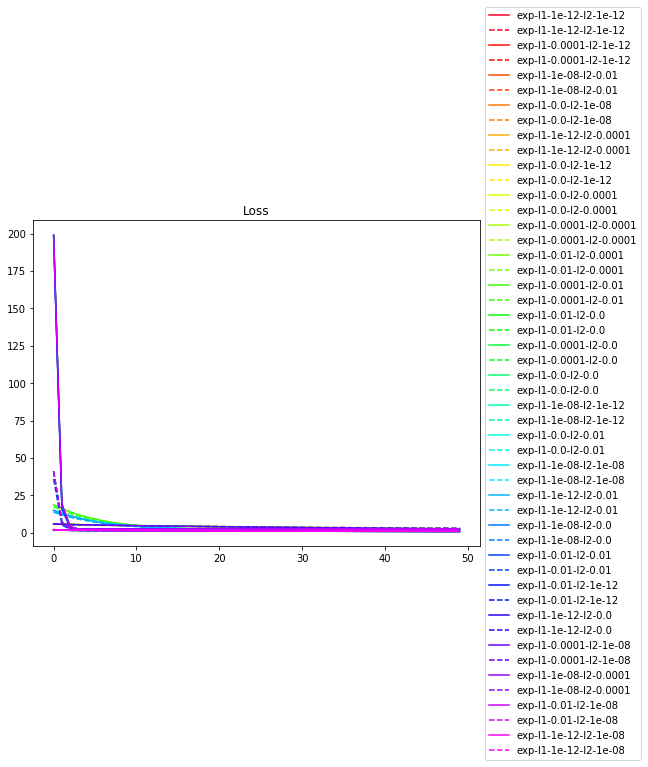

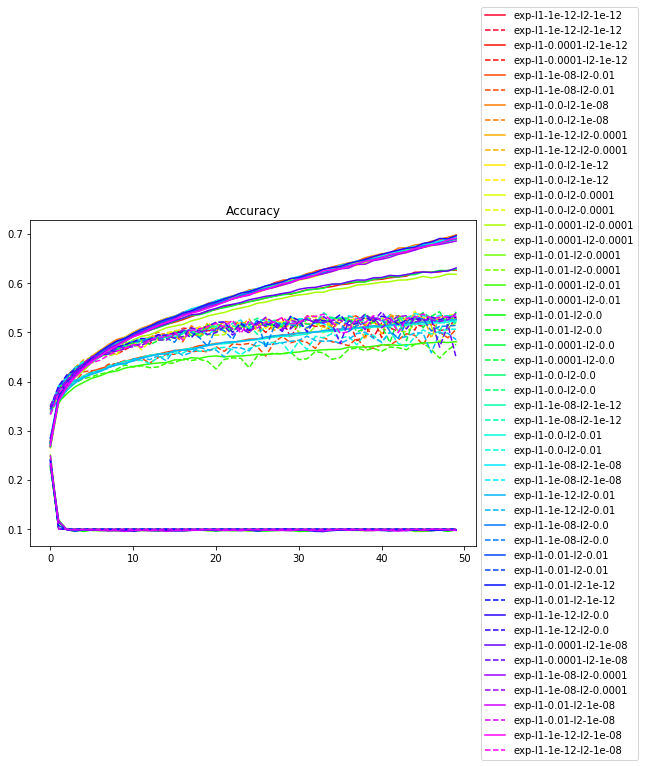

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()